---
![](images/1_3.png)

# Research Policy NLP


---

- Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. 
- Keep in mind, "garbage in, garbage out". 
- Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

1. **Getting the data - **in this case, the data we scraped from Research policies in universities across the Netherlands.
2. **Cleaning the data - **we will walk through popular techniques
3. **Organizing the data - **we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this notebook will be clean, organized data in two standard text formats:

1. **Corpus** - a collection of text
2. **Document-Term Matrix** - word counts in matrix format

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove or transform numerical values
* Remove common non-sensical text (/n)
* Remove stop words

**NLP processing after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...
(to be discussed in the second section)

### Reading saved data

In [1]:
import pandas as pd
import pickle

In [2]:
#load txt files and dump them into pickle
import glob
import glob
txts = glob.glob("txts/*")

In [3]:
#Detect non english policies 
from langdetect import detect
for txt in txts:
    with open(txt) as f:
        lines = f.read().splitlines()
        policy = "".join(lines)
        if detect(policy)!= "en":
            print(txt)            
    

txts/DUTCH 08- Maastricht University - 30-11-22.txt
txts/DUTCH 26-vlhuas -04-12-22.txt


After this step, I will manually add DUTCH to the beginning of the policies and translate the policies using google translate

In [4]:
#load txt files and dump them into pickle
policies = []
for txt in txts:
    if txt[5:10]!="DUTCH":
        with open(txt) as f:
            lines = f.read().splitlines()
            policy = "".join(lines)
            policies.append(policy)
            name =  "pickled " + txt
            with open(name, "wb") as file:
                pickle.dump(policy,file )
    

In [5]:
# Load pickled files in series
ptxts = glob.glob("pickled txts/*")
data = {}
for i, t in enumerate(ptxts):
    with open(t, "rb") as file:
        data[t] = pickle.load(file)

---
###  Data cleaning
<a id="1.3.1">

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

Note that his cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.

In [6]:
# Let's take a look at our data again
data.keys()

dict_keys(['pickled txts/48-codarts-04-12-22.txt', 'pickled txts/39-NHL Stendedn- 04-12-22.txt', 'pickled txts/20-Viaa-04-12-22.txt', 'pickled txts/05 - Leiden University - 28-11-22.txt', 'pickled txts/18-tinbergen-04-12-22.txt', 'pickled txts/50-amsterdamuas- 04-12-22.txt', 'pickled txts/33 - tio - 04-12-22.txt', 'pickled txts/10- TU Eindhoven - 04-12-22.txt', 'pickled txts/40 - inholland - 04-12-22.txt', 'pickled txts/31-Driestar Christian university-  12-04-22.txt', 'pickled txts/12 - Tilburg University - 30-11-22.txt', 'pickled txts/07 - rug -28-11-22.txt', 'pickled txts/42- HAS- 04-12-22.txt', 'pickled txts/44- Design academy Eindhoven - 04-12-22.txt', 'pickled txts/41-The Hague- 04-12-22.txt', 'pickled txts/36-Fontys-04-12-22.txt', 'pickled txts/38-Saxion-04-12-22.txt', 'pickled txts/04 - EUR -28-11-22 .txt', 'pickled txts/08- Maastricht University - 30-11-22.txt', 'pickled txts/27-Windesheim-04-12-22.txt', 'pickled txts/34- hogeschool Leiden - 04-12-22.txt', 'pickled txts/47 - R

In [7]:
# Pandas friendly dictionary form
data_formatted = {key: [value] for (key, value) in data.items()}

In [8]:
# We can either keep it in dictionary format or put it into a pandas dataframe
pd.set_option('max_colwidth',1000)
data_df = pd.DataFrame.from_dict(data_formatted).transpose()

In [9]:
data_df.columns = ['policy']
data_df = data_df.sort_index()
data_df.head(2)

,policy
pickled txts/04 - EUR -28-11-22 .txt,"1 Research Data Management (RDM) policy of Erasmus University Rotterdam (EUR) Versi on: 1.0 Date: 14th of August 2020 1. PREAMBLE The Erasmus University Rotterdam (EUR) recognizes the fundamental importance of research data and the management of related administrative records in maintaining quality research and scientific integrity . In addition , the EUR committed to the FAIR data principles (2016) and is pursuing the highest standards. The EUR acknowledges that : Correct and easily r etrievable research data are the foundation of and integral to every research project. Research data are necessary for the verification and defence of research processes and results. RDM policies are highly valuable to current and future researchers. Research data have a long -term value for research and academia, with the potential for widespread use in society. 2. DEFINITIONS Research is any creative and systematically performed work with the goal of furthering knowledge, inclu..."
pickled txts/05 - Leiden University - 28-11-22.txt,"1 DATA MANAGEMENT POLICY Department Cultural Anthrop ology Development Sociology (CA DS) Leiden, April 2019 Introduction: The department of CA DS adheres to the Leiden University Research Data Management Regulations and to the international principles for FAIR data (Findable, Accessible, Interoperable, Reusable), to the extent that these apply to processed data only (see below under ‘What are data?’) and to the extent that the processed data can be rendered interpretable to others. These principles translat e into 7 elements for a data management policy: 1. Research data are considered public goods, created using public money and should therefore be open access available as much as possible. 2. Data should be stored safely and sustainably to enable the protectio n of privacy, verification and reuse. 3. Privacy should be guaranteed with utmost care to ensure the safety of research participants and because the maintenance of relationships of trust with research participants..."


In [10]:
# Let's take a look at the ARX report
print(data_df.policy.loc['pickled txts/08- Maastricht University - 30-11-22.txt'][0:800])

UM Data Management Code of ConductCODE OF CONDUCT FOR RESEARCH DATA MANAGEMENT UNIVERSITY OF MAASTRICHTResearch dataResearch data is valuable for Maastricht University (hereinafter UM). They always playmore important role in the scientific process and must be managed carefully and with integrityto enable reuse and verification of research results. Data management isindispensable and includes all actions that lead to digital research datafindable, accessible and understandable in the long term: organization, documentation, storage,sharing and archiving research data. In addition to classification based on availability,integrity and confidentiality (BIV), inherent security measures1 and privacy legislation2 aimportant role. Data management works best by far when it's in the beginningresearch


<br>
Applying a first round of text cleaning techniques

In [11]:
import re
import string

In [12]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

In [13]:
# Let's apply and take a look at the updated text
data_clean = pd.DataFrame(data_df.policy.apply(clean_text_round1))

In [14]:
data_clean.head(2)

,policy
pickled txts/04 - EUR -28-11-22 .txt,research data management rdm policy of erasmus university rotterdam eur versi on date of august preamble the erasmus university rotterdam eur recognizes the fundamental importance of research data and the management of related administrative records in maintaining quality research and scientific integrity in addition the eur committed to the fair data principles and is pursuing the highest standards the eur acknowledges that correct and easily r etrievable research data are the foundation of and integral to every research project research data are necessary for the verification and defence of research processes and results rdm policies are highly valuable to current and future researchers research data have a long term value for research and academia with the potential for widespread use in society definitions research is any creative and systematically performed work with the goal of furthering knowledge including disc...
pickled txts/05 - Leiden University - 28-11-22.txt,data management policy department cultural anthrop ology development sociology ca ds leiden april introduction the department of ca ds adheres to the leiden university research data management regulations and to the international principles for fair data findable accessible interoperable reusable to the extent that these apply to processed data only see below under ‘what are data ’ and to the extent that the processed data can be rendered interpretable to others these principles translat e into elements for a data management policy research data are considered public goods created using public money and should therefore be open access available as much as possible data should be stored safely and sustainably to enable the protectio n of privacy verification and reuse privacy should be guaranteed with utmost care to ensure the safety of research participants and because the maintenance of relationships of trust with research participants is...


<br>
Applying a second round of text cleaning techniques removing xml stuff

In [15]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('<.*?>', ' ', text)
    text = re.sub('\\n', ' ', text) 
    text = re.sub('\n', ' ', text) 
    text = re.sub('\t', ' ', text) 
    return text

In [16]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.policy.apply(clean_text_round2))

##### NOTE: we're overwriting the data object each time since we want to make better use of RAM memory

---
### Corpus organization
<a id="1.3.2">

*Text Corpus [Wikipedia definition](https://en.wikipedia.org/wiki/Text_corpus)*

- We already created a corpus in an earlier step. 
- The definition of a corpus is a collection of texts
- They are all put together neatly in a pandas dataframe here.
- The idea is to preserve the corpora in reproducible formats `csv`, `txt`, or `pickle`

In [17]:
names=[]
for txt in data_clean.index:
    s = txt.find("-")
    e = txt[s+1:].find("-")
    names.append(txt[s+1:e+s+1])
names    

[' EUR ',
 ' Leiden University ',
 ' WUR ',
 ' rug ',
 ' Maastricht University ',
 ' Vrije Universiteit Amsterdam ',
 ' TU Eindhoven ',
 ' University of Twente ',
 ' Tilburg University ',
 ' Open University ',
 ' HAN ',
 'ZUYD',
 'AUAS ',
 ' international HU ',
 'tinbergen',
 'artez',
 'Viaa',
 'marnix',
 'hku',
 ' Amsterdam University College',
 'avans',
 ' UVH ',
 'vlhuas ',
 'Windesheim',
 'AHK ',
 ' TIAS ',
 'BUAS ',
 'Driestar Christian university',
 ' HZ ',
 ' tio ',
 ' hogeschool Leiden ',
 ' rotterdam uas ',
 'Fontys',
 'Aeres',
 'Saxion',
 'NHL Stendedn',
 ' inholland ',
 'The Hague',
 ' HAS',
 ' Hotelschool The Hague',
 ' Design academy Eindhoven ',
 ' Royal academy of art The Hague',
 'Wittenborg',
 ' Royal Conservatoire The Hague',
 'codarts',
 'Webster',
 'amsterdamuas']

In [18]:
data_clean.index = names

In [19]:
data_clean

,policy
EUR,research data management rdm policy of erasmus university rotterdam eur versi on date of august preamble the erasmus university rotterdam eur recognizes the fundamental importance of research data and the management of related administrative records in maintaining quality research and scientific integrity in addition the eur committed to the fair data principles and is pursuing the highest standards the eur acknowledges that correct and easily r etrievable research data are the foundation of and integral to every research project research data are necessary for the verification and defence of research processes and results rdm policies are highly valuable to current and future researchers research data have a long term value for research and academia with the potential for widespread use in society definitions research is any creative and systematically performed work with the goal of furthering knowledge including disc...
Leiden University,data management policy department cultural anthrop ology development sociology ca ds leiden april introduction the department of ca ds adheres to the leiden university research data management regulations and to the international principles for fair data findable accessible interoperable reusable to the extent that these apply to processed data only see below under what are data and to the extent that the processed data can be rendered interpretable to others these principles translat e into elements for a data management policy research data are considered public goods created using public money and should therefore be open access available as much as possible data should be stored safely and sustainably to enable the protectio n of privacy verification and reuse privacy should be guaranteed with utmost care to ensure the safety of research participants and because the maintenance of relationships of trust with research participants is f...
WUR,data policy at wurwur has a policy in place on how to handle research data throughout the research cycle the research data policy has a focus on keeping research data safe and accessible both during and after research the wur data policy applies to employees with a wur contract but does not apply to students unless specific agreements have been made between students and their supervisors wur data policythe policy is based on leading principles in the area of research data stewardship such as the fair principles and on national frameworks such as the netherlands code of conduct for research integrity research data are highly valuable output of our research we need to treat our data carefully it is only then that our research can be shared verified and reused as such the wur data policy requires the following chair groups are required to have a data management protocol phd candidates are required to have data management plan data should be stored on secure and shareable e...
rug,ug research data introductionthe multitude of data being generated and collectedworldwide offers researchers enormous potentialfor new inventions perspectives and innovative solutions the condition is that this data is findable accessible and useable responsible data managementcontributes to the transparency and reliability ofscientific conclusions has a positive influence onpublic confidence in science and increases the socialimpact of research the university of groningen wantsto contribute to science and society andtherefore endorses the principles of open scienceand fair data this memorandum sets out the ug wide starting pointsfor dealing with research data and datamanagement this concerns a general framework settingout basic principles and responsibilities fordealing with data that is useable for research thatcan be published or exploited firstly the ugresearch data management policy includes the standardsand principles for good data management for the purpose of verif...
Maastricht University,um data management code of conductcode of conduct for research data 

In [20]:
# Save the corpus
data_clean.to_pickle("pickle/policy_corpus.pkl")

---
###  Document-Term Matrix
<a id="1.3.3">

*Document-Term Matrix [Wikipedia definition](https://en.wikipedia.org/wiki/Document-term_matrix)*

- For many of the techniques, the text must be tokenized, (broken down into smaller pieces). 
- The most common tokenization technique is to break down text into words. 
- We can do this using `scikit-learn`'s `CountVectorizer`, where every row will represent a different document and every column will represent a different word.
- In addition, with `CountVectorizer`, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.
- I will add some stop words that are commonly used in Research Policies such as research data or universities names.

In [21]:
# CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
import numpy as np
unis = []
for uni in names:
    for word in uni.split():
        unis.append(word)
unis =list(np.unique(np.array(unis)))
unis

['AHK',
 'AUAS',
 'Aeres',
 'Amsterdam',
 'BUAS',
 'Christian',
 'College',
 'Conservatoire',
 'Design',
 'Driestar',
 'EUR',
 'Eindhoven',
 'Fontys',
 'HAN',
 'HAS',
 'HU',
 'HZ',
 'Hague',
 'Hotelschool',
 'Leiden',
 'Maastricht',
 'NHL',
 'Open',
 'Royal',
 'Saxion',
 'Stendedn',
 'TIAS',
 'TU',
 'The',
 'Tilburg',
 'Twente',
 'UVH',
 'Universiteit',
 'University',
 'Viaa',
 'Vrije',
 'WUR',
 'Webster',
 'Windesheim',
 'Wittenborg',
 'ZUYD',
 'academy',
 'amsterdamuas',
 'art',
 'artez',
 'avans',
 'codarts',
 'hku',
 'hogeschool',
 'inholland',
 'international',
 'marnix',
 'of',
 'rotterdam',
 'rug',
 'tinbergen',
 'tio',
 'uas',
 'university',
 'vlhuas']

In [24]:
from sklearn.feature_extraction import text 
additional_stop_words = ["research","data","university","research data"]
names_low = list(map(lambda x: x.lower(), unis))
additional_stop_words+= names_low
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [25]:
# Calling the CountVectorizer object and assign deletion of english stop words
cv = CountVectorizer(stop_words='english')

*See [stop words](https://en.wikipedia.org/wiki/Stop_words)*

`CountVectorizer` object has 2 main methods
- `fit_transform`
- `get_feature_names`

In [26]:
data_cv = cv.fit_transform(data_clean.policy)
data_tokens = cv.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<br>
Having the elements simply just create dataframe using `pandas`

In [27]:
data_matrix = pd.DataFrame(data_cv.toarray(), columns=data_tokens)
data_matrix.index = data_clean.index

In [28]:
data_matrix.head()

,aa,aaanet,aan,ab,abbreviation,abbreviations,abdo,abide,abides,abjz,...,zaaizaad,zation,zelf,zero,zet,zip,zuyd,zuydnet,zwolle,zwollephone
EUR,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leiden University,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WUR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rug,0,0,0,0,1,0,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0
Maastricht University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>
We can now dump the files on our binary pickles

In [29]:
data_matrix.to_pickle("pickle/policy_matrix.pkl")

In [30]:
# Let's also pickle the CountVectorizer object
pickle.dump(cv, open("pickle/policy_cv.pkl", "wb"))

---
#### *Learn more about CountVectorizer at the official [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) documentation*

# Data Analysis

## Exploratory data analysis of annual reports

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any algorithm, let's explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques.
1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and total
3. **Trade-off Risk** - most common terms

---
###  Most Common Words
We will read the document-term matrix and explore the words per document

In [31]:
data = data_matrix.transpose()

<br>
Find the top 30 words per report where each report is on every column

In [32]:
data.columns

Index([' EUR ', ' Leiden University ', ' WUR ', ' rug ',
       ' Maastricht University ', ' Vrije Universiteit Amsterdam ',
       ' TU Eindhoven ', ' University of Twente ', ' Tilburg University ',
       ' Open University ', ' HAN ', 'ZUYD', 'AUAS ', ' international HU ',
       'tinbergen', 'artez', 'Viaa', 'marnix', 'hku',
       ' Amsterdam University College', 'avans', ' UVH ', 'vlhuas ',
       'Windesheim', 'AHK ', ' TIAS ', 'BUAS ',
       'Driestar Christian university', ' HZ ', ' tio ', ' hogeschool Leiden ',
       ' rotterdam uas ', 'Fontys', 'Aeres', 'Saxion', 'NHL Stendedn',
       ' inholland ', 'The Hague', ' HAS', ' Hotelschool The Hague',
       ' Design academy Eindhoven ', ' Royal academy of art The Hague',
       'Wittenborg', ' Royal Conservatoire The Hague', 'codarts', 'Webster',
       'amsterdamuas'],
      dtype='object')

In [33]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [34]:
top_words = pd.DataFrame.from_dict(top_dict)
top_words.head()

,EUR,Leiden University,WUR,rug,Maastricht University,Vrije Universiteit Amsterdam,TU Eindhoven,University of Twente,Tilburg University,Open University,...,The Hague,HAS,Hotelschool The Hague,Design academy Eindhoven,Royal academy of art The Hague,Wittenborg,Royal Conservatoire The Hague,codarts,Webster,amsterdamuas
0,"(data, 69)","(data, 317)","(data, 15)","(data, 166)","(data, 34)","(research, 80)","(policies, 3)","(data, 198)","(data, 307)","(data, 26)",...,"(research, 26)","(green, 12)","(data, 33)","(data, 47)","(information, 14)","(privacy, 14)","(privacy, 4)","(health, 8)","(data, 16)","(data, 51)"
1,"(research, 59)","(research, 133)","(research, 10)","(research, 119)","(research, 19)","(data, 80)","(guidelines, 2)","(research, 117)","(research, 197)","(research, 14)",...,"(education, 7)","(academy, 11)","(personal, 15)","(personal, 26)","(use, 13)","(university, 11)","(hdk, 3)","(research, 7)","(research, 6)","(personal, 36)"
2,"(eur, 25)","(researcher, 42)","(policy, 6)","(management, 52)","(um, 8)","(vu, 33)","(provided, 2)","(rdm, 65)","(management, 82)","(management, 10)",...,"(board, 6)","(data, 11)","(hague, 12)","(privacy, 15)","(privacy, 12)","(notice, 9)","(data, 2)","(slm, 6)","(personal, 5)","(auas, 23)"
3,"(use, 11)","(project, 35)","(wur, 4)","(board, 24)","(management, 7)","(researchers, 22)","(free, 1)","(management, 52)","(personal, 43)","(phase, 5)",...,"(quality, 6)","(students, 10)","(hotelschool, 12)","(processing, 15)","(arts, 11)","(information, 9)","(information, 2)","(mental, 5)","(protection, 5)","(information, 17)"
4,"(project, 11)","(participants, 33)","(required, 3)","(principles, 21)","(researcher, 7)","(policy, 19)","(original, 1)","(policy, 43)","(university, 36)","(guidelines, 5)",...,"(improved, 4)","(course, 8)","(student, 9)","(dae, 14)","(website, 11)","(services, 7)","(students, 2)","(education, 4)","(processing, 3)","(processing, 13)"


In [35]:
# list of universities we're working on
universities = list(data_matrix.index)


In [36]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for uni in data.columns:
    uniques = data[uni].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [37]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(universities, unique_list)), columns=['university', 'unique_words'])

In [38]:
data_words.head()

,university,unique_words
0,EUR,514
1,Leiden University,1341
2,WUR,64
3,rug,1258
4,Maastricht University,229


In [39]:
# Find the total number of words per document
total_list = []
for uni in data.columns:
    totals = sum(data[uni])
    total_list.append(totals)
# Let's add some columns to our dataframe
data_words['total_words'] = total_list

In [40]:
data_words.describe()

,unique_words,total_words
count,47.000000,47.000000
mean,414.765957,1045.382979
std,395.036003,1380.838428
min,30.000000,35.000000
25%,151.500000,250.500000
50%,290.000000,498.000000
75%,529.000000,1048.000000
max,1710.000000,6861.000000


Having the total words we can make the calculation on relative numbers, since is expected that the lenght of unique words will increase with the lenght of the document so we need to normalize it

In [41]:
# Calculate the ratio
data_words['unique_relative'] = data_words['unique_words']/data_words['total_words']

In [42]:
# Sort it out
data_sort = data_words.sort_values(by='unique_relative', ascending=False)
data_sort.head(10)

,university,unique_words,total_words,unique_relative
6,TU Eindhoven,31,35,0.885714
36,inholland,62,72,0.861111
43,Royal Conservatoire The Hague,43,53,0.811321
30,hogeschool Leiden,30,37,0.810811
27,Driestar Christian university,74,98,0.755102
45,Webster,124,167,0.742515
44,codarts,126,181,0.696133
37,The Hague,190,273,0.695971
33,Aeres,253,382,0.662304
16,Viaa,104,158,0.658228


In [43]:
data_sort.tail(10)

,university,unique_words,total_words,unique_relative
26,BUAS,393,902,0.435698
5,Vrije Universiteit Amsterdam,550,1308,0.420489
31,rotterdam uas,683,1770,0.385876
20,avans,961,2752,0.349201
1,Leiden University,1341,4044,0.331602
7,University of Twente,821,2539,0.323356
25,TIAS,925,2910,0.317869
8,Tilburg University,923,2927,0.315340
21,UVH,1347,4534,0.297089
35,NHL Stendedn,1710,6861,0.249235


In [44]:
import numpy as np
import matplotlib.pyplot as plt

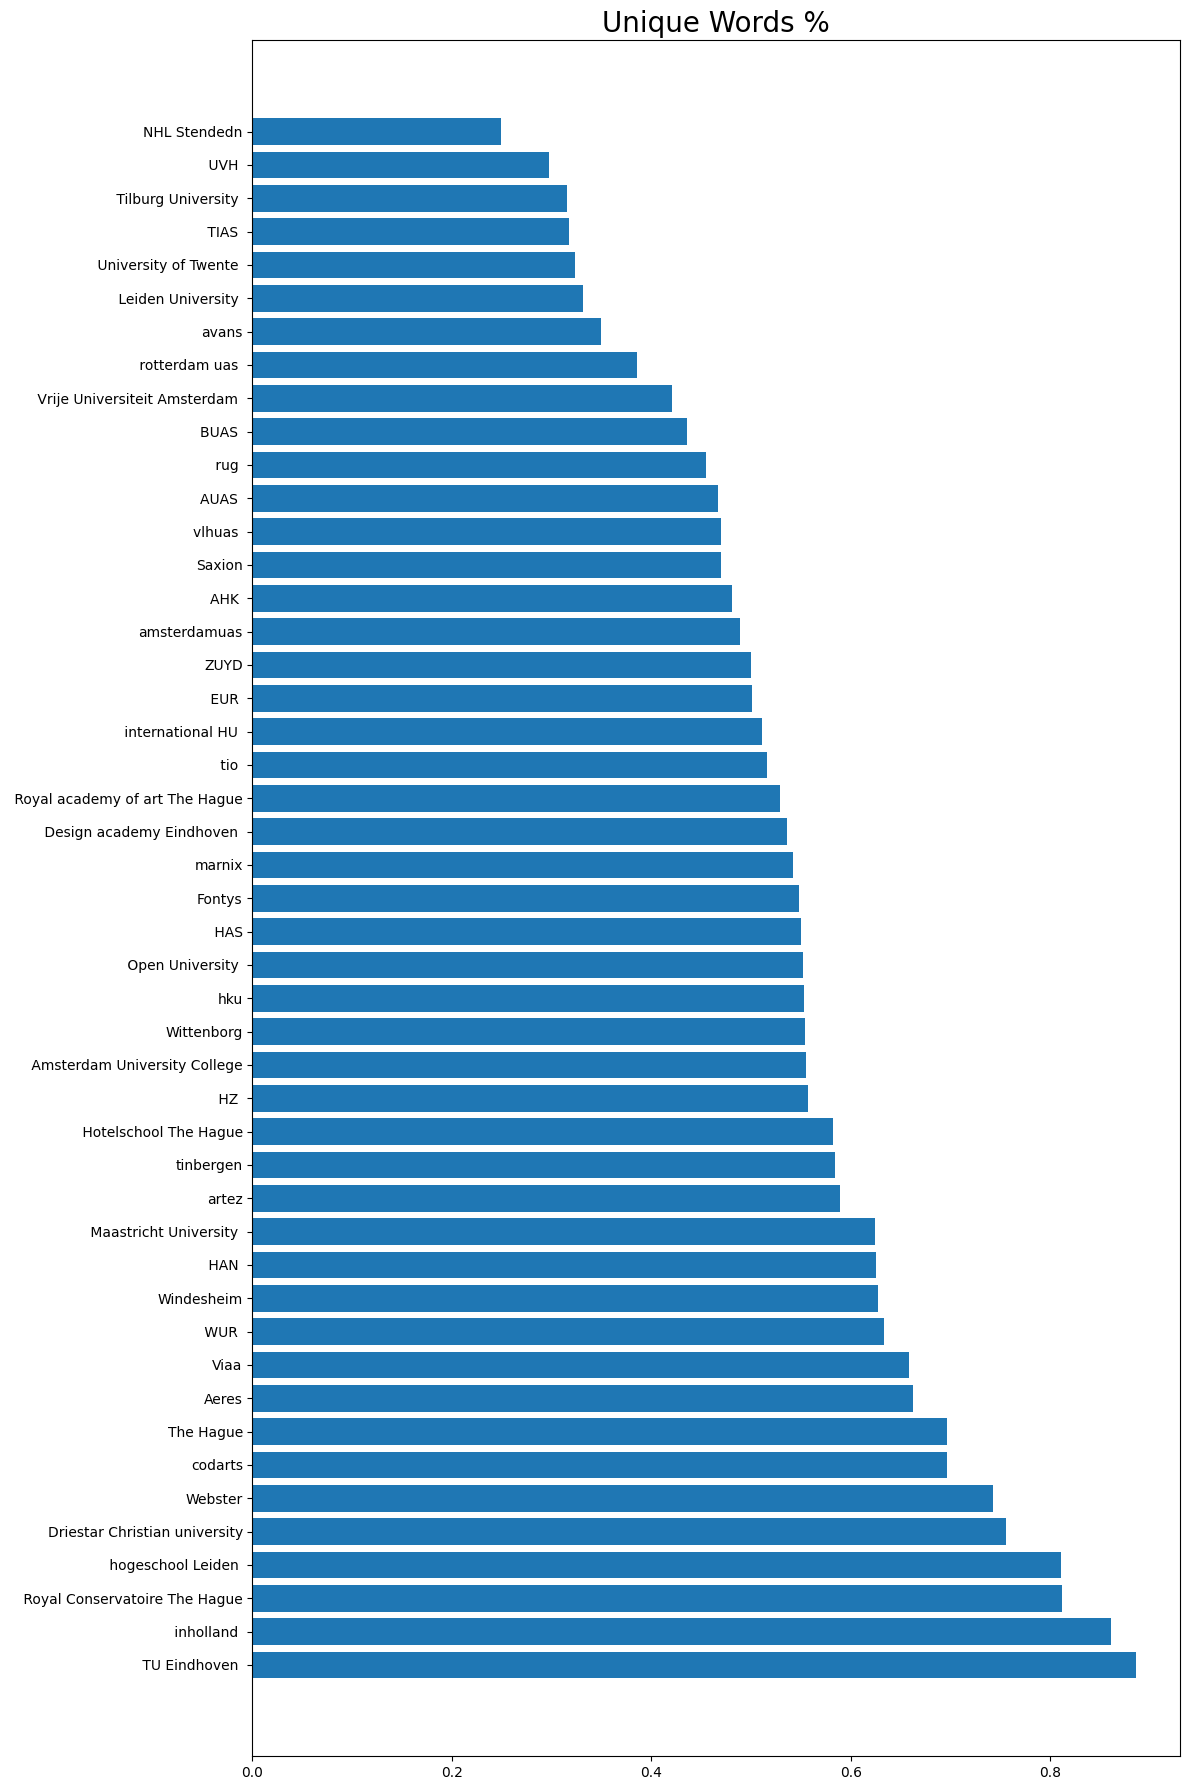

In [45]:
y_pos = np.arange(len(data_words))

plt.rcParams['figure.figsize'] = [12, 18]
plt.barh(y_pos, data_sort.unique_relative, align='center')
plt.yticks(y_pos, data_sort.university)
plt.title('Unique Words %', fontsize=20)

plt.tight_layout()
plt.show()

### Wordclouds
A Word Cloud is a good option to help visually interpret text at first gaze and gain insight into the most prominent items in a given text, by visualizing the word frequency in the text as a weighted list.

In [46]:
# Wordcloud python library
from wordcloud import WordCloud

In [47]:
# Getting n-grams table
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
def ngrams_table(n, list_texts):
    vectorizer = CountVectorizer(ngram_range = (n,n)) 
    X1 = vectorizer.fit_transform(list_texts)  
    features = vectorizer.get_feature_names()
    # Applying TFIDF 
    vectorizer = TfidfVectorizer(ngram_range = (n,n)) 
    X2 = vectorizer.fit_transform(list_texts) 
    # Getting top ranking features 
    sums1 = X1.sum(axis = 0) 
    sums2 = X2.sum(axis = 0) 
    data = [] 
    for col, term in enumerate(features): 
        data.append( (term, sums1[0,col], sums2[0,col] )) 

    return pd.DataFrame(data, columns = ['term','rankCount', 'rankTFIDF']).sort_values('rankCount', ascending = False).reset_index(drop=True)

In [48]:
# Dfining wordcloud object
wc = WordCloud(background_color="white", 
               colormap="Dark2", 
               max_font_size=150, 
               random_state=42)

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alialsaeedi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
stpwords = []
for word in additional_stop_words:
    if word[0] == " ":
        stpwords.append(word[1:])
    else:
        stpwords.append(word)

In [51]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(stpwords)
stpwrd.extend(["nhl","stenden"])

In [52]:
from nltk.tokenize import word_tokenize
adjusted_policies = []
for pol in data_clean.policy :
    text_tokens = word_tokenize(pol)
    tokens_without_sw = [word for word in text_tokens if not word in stpwrd]
    pol = (" ").join(tokens_without_sw)
    adjusted_policies.append(pol)

In [53]:
data_clean.policy = adjusted_policies
data_clean.head()

,policy
EUR,management rdm policy erasmus versi date august preamble erasmus recognizes fundamental importance management related administrative records maintaining quality scientific integrity addition committed fair principles pursuing highest standards acknowledges correct easily r etrievable foundation integral every project necessary verification defence processes results rdm policies highly valuable current future researchers long term value academia potential widespread use society definitions creative systematically performed work goal furthering knowledge including discoveries regarding people culture society addition use knowledge new applications researchers refers active members institution including employees doctoral candidates persons directly affiliated institution purposes make use physically present institution also included term visitin g researchers collaborators including hired staff may also expected comply policy refers information independent form presentation needed su...
Leiden University,management policy department cultural anthrop ology development sociology ca ds april introduction department ca ds adheres management regulations principles fair findable accessible interoperable reusable extent apply processed see extent processed rendered interpretable others principles translat e elements management policy considered public goods created using public money therefore access available much possible stored safely sustainably enable protectio n privacy verification reuse privacy guaranteed utmost care ensure safety participants maintenance relationships trust participants fundamental transparen cy use storage given management plan dmp also used stored according gdpr rules guidelines interpreted relevant financing organizations like nwo interpretability anthropological stored excel sheets databases form lengthy written texts span multiple hand written notebooks digital files e g word docs photos film audio recordings require co ntextualization intelligible researche...
WUR,policy wurwur policy place handle throughout cycle policy focus keeping safe accessible policy applies employees contract apply students unless specific agreements made students supervisors policythe policy based leading principles area stewardship fair principles national frameworks netherlands code conduct integrity highly valuable output need treat carefully shared verified reused policy requires following chair groups required management protocol phd candidates required management plan stored secure shareable environments underlying publication required archived least years need registered pure
rug,ug introductionthe multitude generated collectedworldwide offers researchers enormous potentialfor new inventions perspectives innovative solutions condition findable accessible useable responsible managementcontributes transparency reliability ofscientific conclusions positive influence onpublic confidence science increases socialimpact groningen wantsto contribute science society andtherefore endorses principles scienceand fair memorandum sets ug wide starting pointsfor dealing datamanagement concerns general framework settingout basic principles responsibilities fordealing useable thatcan published exploited firstly ugresearch management policy includes standardsand principles good management purpose verification encourage reuse fair software scripts thatare developed collection analysing representationof joint responsibility managementwithin ug general frameworkpermits tailor made arrangements within institutesand faculties secondly therefore ugresearch management policy theref...
Maastricht University,um management code conductcode conduct management maastrichtresearch dataresearch valuable hereinafter um always playmore important role scientific process must managed carefully integrityto enable reuse verification results management isindispensable includes actions lead digital datafindable accessible understandable long term org

## 1-gram 

n-gram is a term used to represent the length of each token when dividing a corpus, 1-gram for example, means that each word is treated individually, whereas 2-gram means every two words are considered as a token. This would be useful in terms that are longer than 1 word. For example Maastricht University would give a different meaning than just Maastricht or University alone.

In [54]:
table_1grams = ngrams_table(1, data_clean.policy)
table_1grams

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,rankCount,rankTFIDF
0,personal,917,6.931161
1,privacy,425,3.965143
2,information,345,2.908342
3,processing,344,2.472849
4,management,337,2.790069
...,...,...,...
6586,informationyou,1,0.011679
6587,informative,1,0.014275
6588,infrastructuralprovisions,1,0.014275
6589,infrastructurenetworks,1,0.014275


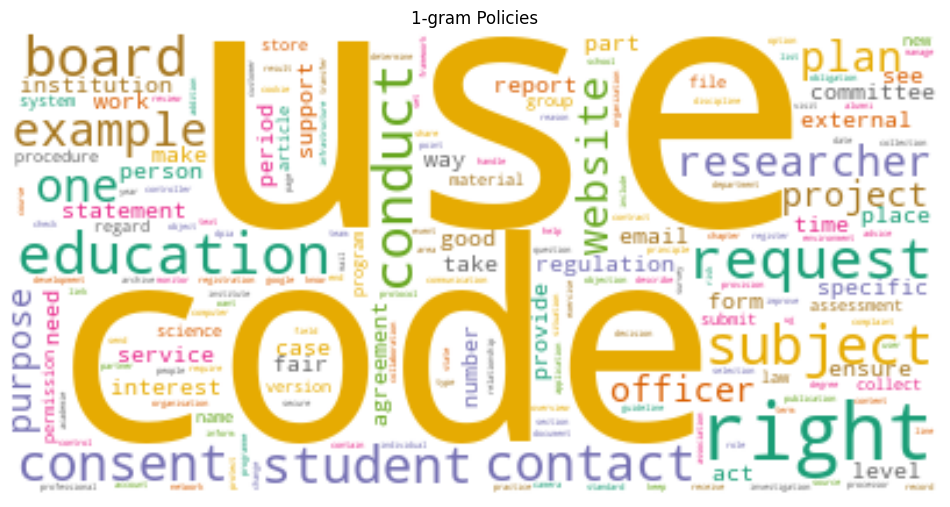

In [55]:
onegram =' '.join([i for i in table_1grams['term']])
wc.generate(onegram)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("1-gram Policies")
plt.show()

### Analysis
After disregarding stopwords that are common in data policies such as "data", "research" or the universities name. 1-gram was applied on the text. The result shows that the word "Personal" was the most common word used which might be due to many policies being privacy statement and the word "personal" would refer to personal data of students or employees in the university. However, the second most common word is "privacy" which is unexpected as it would be more reasonable for privacy to take the first place as privacy is the biggest concern in policies, especially the privacy policies. The number of times "personal" was mentioned is double the times "privacy" was mentioned, which means "personal" is most likely going to be the most common word in policies. The wordcloud shows some of the most common words in policies. The words use and code are the largest in the cloud. Some words related to policies can be seen such as conduct, right, consent. Furthermore, some words related to universities can be seen such as student, education, board and researcher. The word "contact" is probably visible as most policies provide contact information.

## 2-grams

In [56]:
table_2grams = ngrams_table(2, data_clean.policy)
table_2grams

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,rankCount,rankTFIDF
0,applied sciences,192,1.973066
1,processing personal,133,1.249014
2,code conduct,96,0.792748
3,third parties,87,0.931165
4,privacy policy,79,0.771339
...,...,...,...
34184,generated researcher,1,0.014518
34185,generated organization,1,0.014518
34186,generated normalized,1,0.012768
34187,generated employment,1,0.014518


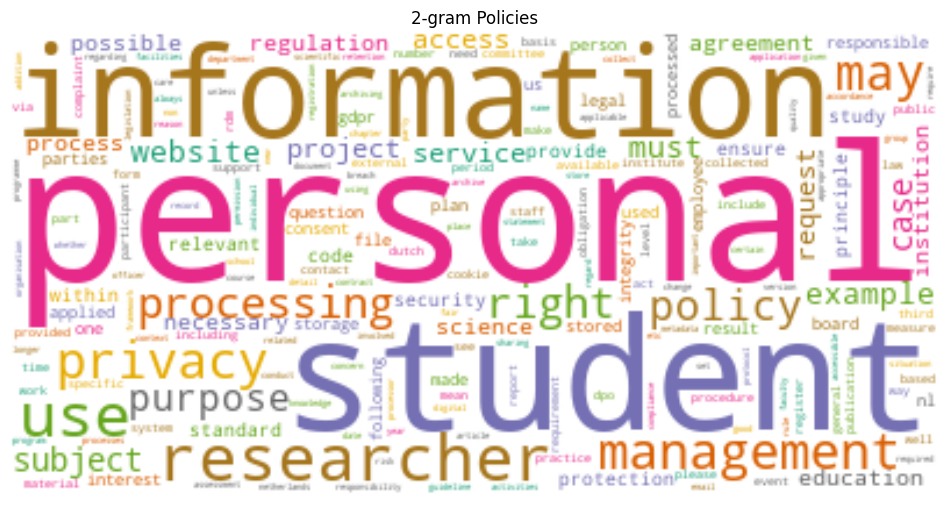

In [57]:
twogram =' '.join([i for i in table_2grams['term']])
wc.generate(twogram)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("2-gram Policies")
plt.show()

### Analysis
The most common 2-grams term is "Applied Sciences" which is related to the work done at a university (either research or applied sciences). Comes next, the term "processing personal", this term is used a lot in policies which refers to processing personal information or data. In the third place comes "code conduct" which is also related to policies. An intereseting term used is the term in the 5th place: "privacy policy" as it shows the nature of most of the policies used in the analysis. In the wordcloud, we can see the word "Personal" which was also seen in the previous analysis of the 1-gram. Then comes words that are related to policies of universities such as "student", "information", "privacy", "researcher" and "managment".


# 3-grams

In [58]:
table_3grams = ngrams_table(3, data_clean.policy)
table_3grams

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,rankCount,rankTFIDF
0,code conduct integrity,43,0.415787
1,general protection regulation,41,0.569210
2,applied sciences privacy,40,0.371126
3,ltab zero ltab,38,0.387020
4,privacy policy plan,37,0.364000
...,...,...,...
42071,given specific information,1,0.056634
42072,given strategic agenda,1,0.062149
42073,given subject private,1,0.062149
42074,given twenty workshops,1,0.009838


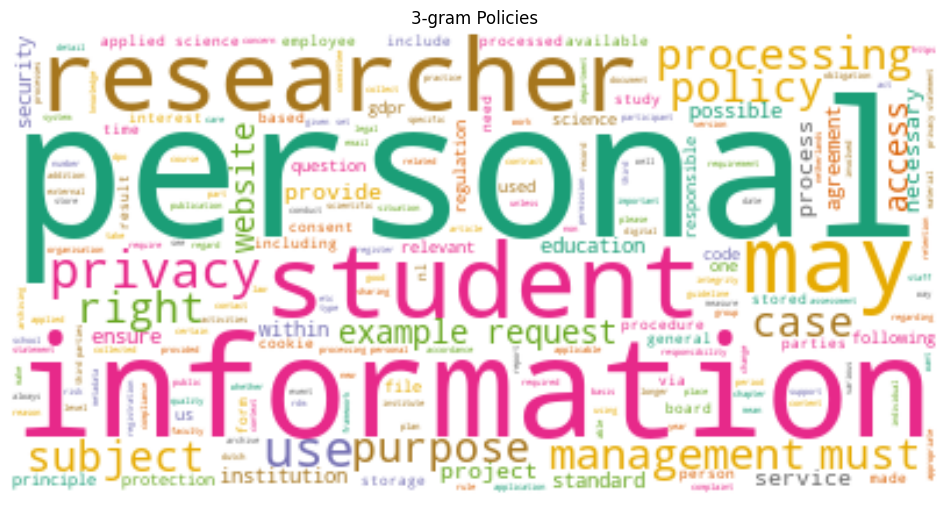

In [59]:
threegram =' '.join([i for i in table_3grams['term']])
wc.generate(threegram)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("3-gram Policies")
plt.show()

### Analysis 
Due to the increase number of words in a term (3-grams), we can directly notice how the frequency of the terms decreased. Among the top five most frequent 3-grams, we can see that 4 are related to terms that would be in policies. We can also notice that all four terms would make no sense when seperated.

---
### Relevant words analysis (Security-Privacy trade-off)

Among our corpus we might find relevant certain terms related to something in particular, like negative or positive sentiment

In [60]:
top_words

,EUR,Leiden University,WUR,rug,Maastricht University,Vrije Universiteit Amsterdam,TU Eindhoven,University of Twente,Tilburg University,Open University,...,The Hague,HAS,Hotelschool The Hague,Design academy Eindhoven,Royal academy of art The Hague,Wittenborg,Royal Conservatoire The Hague,codarts,Webster,amsterdamuas
0,"(data, 69)","(data, 317)","(data, 15)","(data, 166)","(data, 34)","(research, 80)","(policies, 3)","(data, 198)","(data, 307)","(data, 26)",...,"(research, 26)","(green, 12)","(data, 33)","(data, 47)","(information, 14)","(privacy, 14)","(privacy, 4)","(health, 8)","(data, 16)","(data, 51)"
1,"(research, 59)","(research, 133)","(research, 10)","(research, 119)","(research, 19)","(data, 80)","(guidelines, 2)","(research, 117)","(research, 197)","(research, 14)",...,"(education, 7)","(academy, 11)","(personal, 15)","(personal, 26)","(use, 13)","(university, 11)","(hdk, 3)","(research, 7)","(research, 6)","(personal, 36)"
2,"(eur, 25)","(researcher, 42)","(policy, 6)","(management, 52)","(um, 8)","(vu, 33)","(provided, 2)","(rdm, 65)","(management, 82)","(management, 10)",...,"(board, 6)","(data, 11)","(hague, 12)","(privacy, 15)","(privacy, 12)","(notice, 9)","(data, 2)","(slm, 6)","(personal, 5)","(auas, 23)"
3,"(use, 11)","(project, 35)","(wur, 4)","(board, 24)","(management, 7)","(researchers, 22)","(free, 1)","(management, 52)","(personal, 43)","(phase, 5)",...,"(quality, 6)","(students, 10)","(hotelschool, 12)","(processing, 15)","(arts, 11)","(information, 9)","(information, 2)","(mental, 5)","(protection, 5)","(information, 17)"
4,"(project, 11)","(participants, 33)","(required, 3)","(principles, 21)","(researcher, 7)","(policy, 19)","(original, 1)","(policy, 43)","(university, 36)","(guidelines, 5)",...,"(improved, 4)","(course, 8)","(student, 9)","(dae, 14)","(website, 11)","(services, 7)","(students, 2)","(education, 4)","(processing, 3)","(processing, 13)"
5,"(policy, 11)","(storage, 30)","(students, 2)","(policy, 21)","(applicable, 5)","(management, 18)","(data, 1)","(regulations, 26)","(regulation, 35)","(university, 5)",...,"(expertise, 4)","(personal, 8)","(access, 6)","(permission, 8)","(details, 10)","(applied, 7)","(website, 2)","(physical, 4)","(gdpr, 3)","(cookies, 12)"
6,"(rdm, 8)","(use, 30)","(principles, 2)","(ug, 20)","(based, 4)","(information, 16)","(content, 1)","(related, 26)","(policy, 28)","(archive, 4)",...,"(students, 3)","(relevant, 7)","(students, 6)","(nl, 8)","(hague, 10)","(data, 7)","(personal, 2)","(student, 4)","(information, 3)","(protection, 11)"
7,"(management, 8)","(management, 28)","(need, 2)","(university, 19)","(period, 4)","(nl, 15)","(researchdata, 1)","(ut, 23)","(school, 27)","(matrix, 4)",...,"(thuas, 3)","(unsubscribe, 6)","(programme, 6)","(request, 8)","(university, 10)","(students, 6)","(staff, 1)","(students, 3)","(eu, 2)","(google, 11)"
8,"(rights, 8)","(stored, 28)","(management, 2)","(faculty, 17)","(accessible, 4)","(security, 11)","(line, 1)","(materials, 21)","(tilburg, 26)","(publication, 4)",...,"(strategic, 3)","(education, 6)","(study, 5)","(right, 7)","(data, 8)","(record, 6)","(learn, 1)","(life, 3)","(access, 2)","(request, 10)"
9,"(records, 7)","(access, 27)","(groups, 1)","(www, 16)","(time, 4)","(responsible, 10)","(credited, 1)","(procedures, 20)","(researcher, 24)","(researchers, 3)",...,"(ambitions, 3)","(participants, 5)","(number, 5)","(involved, 7)","(personal, 8)","(sciences, 6)","(privacyin, 1)","(used, 3)","(breach, 2)","(privacy, 10)"


In [61]:
# Let's isolate just these risk words
data_risk_words = data_matrix[['security', 'privacy']]
data_risk_words.head()

,security,privacy
EUR,1,0
Leiden University,6,13
WUR,0,0
rug,2,1
Maastricht University,1,3


In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
# We include the total count to this new dataframe
data_risk_words['total_words'] = list(data_sort.sort_values('university').total_words)

In [64]:
data_risk_words.head()

,security,privacy,total_words
EUR,1,0,335
Leiden University,6,13,689
WUR,0,0,1026
rug,2,1,80
Maastricht University,1,3,360


In [65]:
# We calculate the relatives
data_risk_words['relative_security'] = \
    data_risk_words['security']/data_risk_words['total_words']*1000

data_risk_words['relative_privacy'] = \
    data_risk_words['privacy']/data_risk_words['total_words']*1000

In [66]:
avg = data_risk_words.total_words.mean()
data_risk_words['distance_average'] = [round(i/avg,2) for i in data_risk_words.total_words]

In [67]:
data_risk_words.head()

,security,privacy,total_words,relative_security,relative_privacy,distance_average
EUR,1,0,335,2.985075,0.000000,0.32
Leiden University,6,13,689,8.708273,18.867925,0.66
WUR,0,0,1026,0.000000,0.000000,0.98
rug,2,1,80,25.000000,12.500000,0.08
Maastricht University,1,3,360,2.777778,8.333333,0.34


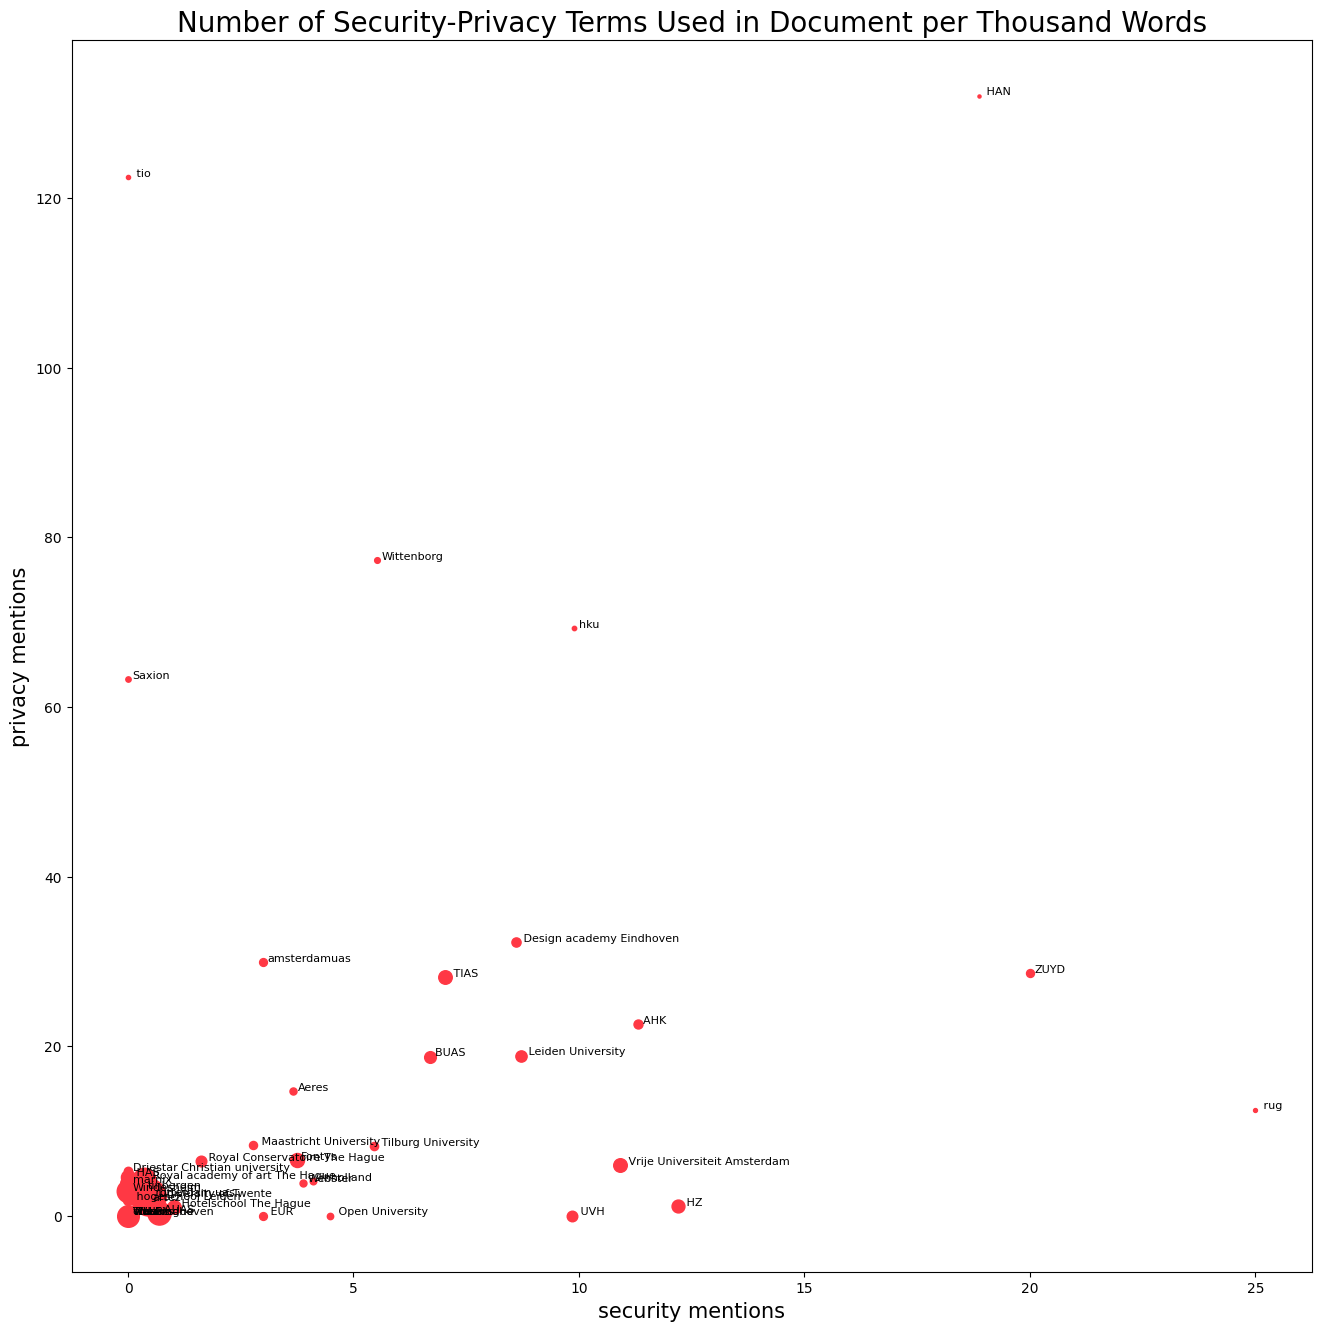

In [68]:

plt.rcParams['figure.figsize'] = [16, 16]

for i, uni in enumerate(data_risk_words.index):
    x = round(data_risk_words.relative_security.loc[uni],2)
    y = round(data_risk_words.relative_privacy.loc[uni],2)
    s = round(data_risk_words.distance_average.loc[uni],2)
    if x<=25 and y<=150:
        plt.scatter(x, y, color='#FF3844', alpha=1, s=s*100)
        plt.text(x+0.1, y+0.1, data_risk_words.index[i], fontsize=8)
    
plt.title('Number of Security-Privacy Terms Used in Document per Thousand Words', fontsize=20)
plt.xlabel('security mentions', fontsize=15)
plt.ylabel('privacy mentions', fontsize=15)
plt.show()

### Analysis
The plot shows that most universities mentions privacy and security only few times. However, we can also see that many of the well-known universities mentiones security+privacy in a fair amount. We can also see that privacy is mentioned more than security in many of the universitty policies as the range of the privacy mentions is higher than the range of security mentions. The most balanced university in mentioning both privacy and security is ZUYD. Whereas HAN is the university that mentioned privacy the most, and comes second after ZUYD in the number of times mentioning security.

#  Policy Sentiment Analysis
Sentiment analysis is a subfield within: 
- Textual analysis
- Natural language processing
- Content analysis
- Computational linguistics

Increased interest attributable to:
- Bigger, faster computers → faster processing of data (HFTs)
- Availability of large quantities of text → better interpretation of information
- New technologies derived from search engines → improve quality of information

Some early financial sentiment analysis by [Paul C. Tetlock](https://www.jstor.org/stable/4622297?seq=1#metadata_info_tab_contents)
![](images/paultetlock.png)
Applications  
- Stock prediction is a concurrent application of text mining to give scores (financial sentiments) and trade
- Automate news analysis: Contents and Tone, Measurement of qualitative and quantitative attributes
- The dictionaries or lexicon is domain specific.
- You have also events (predicates) we can say that is organization events, on an unsupervised approach, *See: [The Stock Sonar](https://pdfs.semanticscholar.org/a9b7/bf3e34c1a0235d07d423eb9d0c3b46c630e5.pdf)*
- We have more applications and better interfaces, *See happines of the world [hedenometer](http://hedonometer.org/index.html)

---
### Sentiment correlation

1. **TextBlob package:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob package allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity, for the following example and we can define a corpus' sentiment ias the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how `TextBlob` coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

In [69]:
data = pd.read_pickle('pickle/policy_corpus.pkl')
data.head()

,policy
EUR,research data management rdm policy of erasmus university rotterdam eur versi on date of august preamble the erasmus university rotterdam eur recognizes the fundamental importance of research data and the management of related administrative records in maintaining quality research and scientific integrity in addition the eur committed to the fair data principles and is pursuing the highest standards the eur acknowledges that correct and easily r etrievable research data are the foundation of and integral to every research project research data are necessary for the verification and defence of research processes and results rdm policies are highly valuable to current and future researchers research data have a long term value for research and academia with the potential for widespread use in society definitions research is any creative and systematically performed work with the goal of furthering knowledge including disc...
Leiden University,data management policy department cultural anthrop ology development sociology ca ds leiden april introduction the department of ca ds adheres to the leiden university research data management regulations and to the international principles for fair data findable accessible interoperable reusable to the extent that these apply to processed data only see below under what are data and to the extent that the processed data can be rendered interpretable to others these principles translat e into elements for a data management policy research data are considered public goods created using public money and should therefore be open access available as much as possible data should be stored safely and sustainably to enable the protectio n of privacy verification and reuse privacy should be guaranteed with utmost care to ensure the safety of research participants and because the maintenance of relationships of trust with research participants is f...
WUR,data policy at wurwur has a policy in place on how to handle research data throughout the research cycle the research data policy has a focus on keeping research data safe and accessible both during and after research the wur data policy applies to employees with a wur contract but does not apply to students unless specific agreements have been made between students and their supervisors wur data policythe policy is based on leading principles in the area of research data stewardship such as the fair principles and on national frameworks such as the netherlands code of conduct for research integrity research data are highly valuable output of our research we need to treat our data carefully it is only then that our research can be shared verified and reused as such the wur data policy requires the following chair groups are required to have a data management protocol phd candidates are required to have data management plan data should be stored on secure and shareable e...
rug,ug research data introductionthe multitude of data being generated and collectedworldwide offers researchers enormous potentialfor new inventions perspectives and innovative solutions the condition is that this data is findable accessible and useable responsible data managementcontributes to the transparency and reliability ofscientific conclusions has a positive influence onpublic confidence in science and increases the socialimpact of research the university of groningen wantsto contribute to science and society andtherefore endorses the principles of open scienceand fair data this memorandum sets out the ug wide starting pointsfor dealing with research data and datamanagement this concerns a general framework settingout basic principles and responsibilities fordealing with data that is useable for research thatcan be published or exploited firstly the ugresearch data management policy includes the standardsand principles for good data management for the purpose of verif...
Maastricht University,um data management code of conductcode of conduct for research data 

In [70]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['policy'].apply(pol)
data['subjectivity'] = data['policy'].apply(sub)

In [71]:
data.head()

,policy,polarity,subjectivity
EUR,research data management rdm policy of erasmus university rotterdam eur versi on date of august preamble the erasmus university rotterdam eur recognizes the fundamental importance of research data and the management of related administrative records in maintaining quality research and scientific integrity in addition the eur committed to the fair data principles and is pursuing the highest standards the eur acknowledges that correct and easily r etrievable research data are the foundation of and integral to every research project research data are necessary for the verification and defence of research processes and results rdm policies are highly valuable to current and future researchers research data have a long term value for research and academia with the potential for widespread use in society definitions research is any creative and systematically performed work with the goal of furthering knowledge including disc...,0.125926,0.427827
Leiden University,data management policy department cultural anthrop ology development sociology ca ds leiden april introduction the department of ca ds adheres to the leiden university research data management regulations and to the international principles for fair data findable accessible interoperable reusable to the extent that these apply to processed data only see below under what are data and to the extent that the processed data can be rendered interpretable to others these principles translat e into elements for a data management policy research data are considered public goods created using public money and should therefore be open access available as much as possible data should be stored safely and sustainably to enable the protectio n of privacy verification and reuse privacy should be guaranteed with utmost care to ensure the safety of research participants and because the maintenance of relationships of trust with research participants is f...,0.059804,0.408960
WUR,data policy at wurwur has a policy in place on how to handle research data throughout the research cycle the research data policy has a focus on keeping research data safe and accessible both during and after research the wur data policy applies to employees with a wur contract but does not apply to students unless specific agreements have been made between students and their supervisors wur data policythe policy is based on leading principles in the area of research data stewardship such as the fair principles and on national frameworks such as the netherlands code of conduct for research integrity research data are highly valuable output of our research we need to treat our data carefully it is only then that our research can be shared verified and reused as such the wur data policy requires the following chair groups are required to have a data management protocol phd candidates are required to have data management plan data should be stored on secure and shareable e...,0.157637,0.503077
rug,ug research data introductionthe multitude of data being generated and collectedworldwide offers researchers enormous potentialfor new inventions perspectives and innovative solutions the condition is that this data is findable accessible and useable responsible data managementcontributes to the transparency and reliability ofscientific conclusions has a positive influence onpublic confidence in science and increases the socialimpact of research the university of groningen wantsto contribute to science and society andtherefore endorses the principles of open scienceand fair data this memorandum sets out the ug wide starting pointsfor dealing with research data and datamanagement this concerns a general framework settingout basic principles and responsibilities fordealing with data that is useable for research thatcan be published or exploited firstly the ugresearch data management policy includes the standardsand principles for good data management for the purpose of verif...,0.124953,0.413

In [72]:
data.iloc[0]

policy                research data management  rdm   policy of erasmus university rotterdam  eur   versi on      date     of august         preamble  the erasmus university rotterdam  eur  recognizes the fundamental importance of research data and the management of related administrative records in maintaining quality research and scientific integrity   in addition   the eur  committed to the fair data principles     and is pursuing the highest standards   the eur  acknowledges that   correct and easily r etrievable research data are the foundation of and integral to every research project  research data  are necessary for the verification and defence of research processes and results   rdm policies are highly valuable to current and future researchers   research data have a long  term value for research and academia  with the potential for widespread use in society       definitions  research  is any creative and systematically performed work with the goal of furthering knowledge  in

In [73]:
data.index

Index([' EUR ', ' Leiden University ', ' WUR ', ' rug ',
       ' Maastricht University ', ' Vrije Universiteit Amsterdam ',
       ' TU Eindhoven ', ' University of Twente ', ' Tilburg University ',
       ' Open University ', ' HAN ', 'ZUYD', 'AUAS ', ' international HU ',
       'tinbergen', 'artez', 'Viaa', 'marnix', 'hku',
       ' Amsterdam University College', 'avans', ' UVH ', 'vlhuas ',
       'Windesheim', 'AHK ', ' TIAS ', 'BUAS ',
       'Driestar Christian university', ' HZ ', ' tio ', ' hogeschool Leiden ',
       ' rotterdam uas ', 'Fontys', 'Aeres', 'Saxion', 'NHL Stendedn',
       ' inholland ', 'The Hague', ' HAS', ' Hotelschool The Hague',
       ' Design academy Eindhoven ', ' Royal academy of art The Hague',
       'Wittenborg', ' Royal Conservatoire The Hague', 'codarts', 'Webster',
       'amsterdamuas'],
      dtype='object')

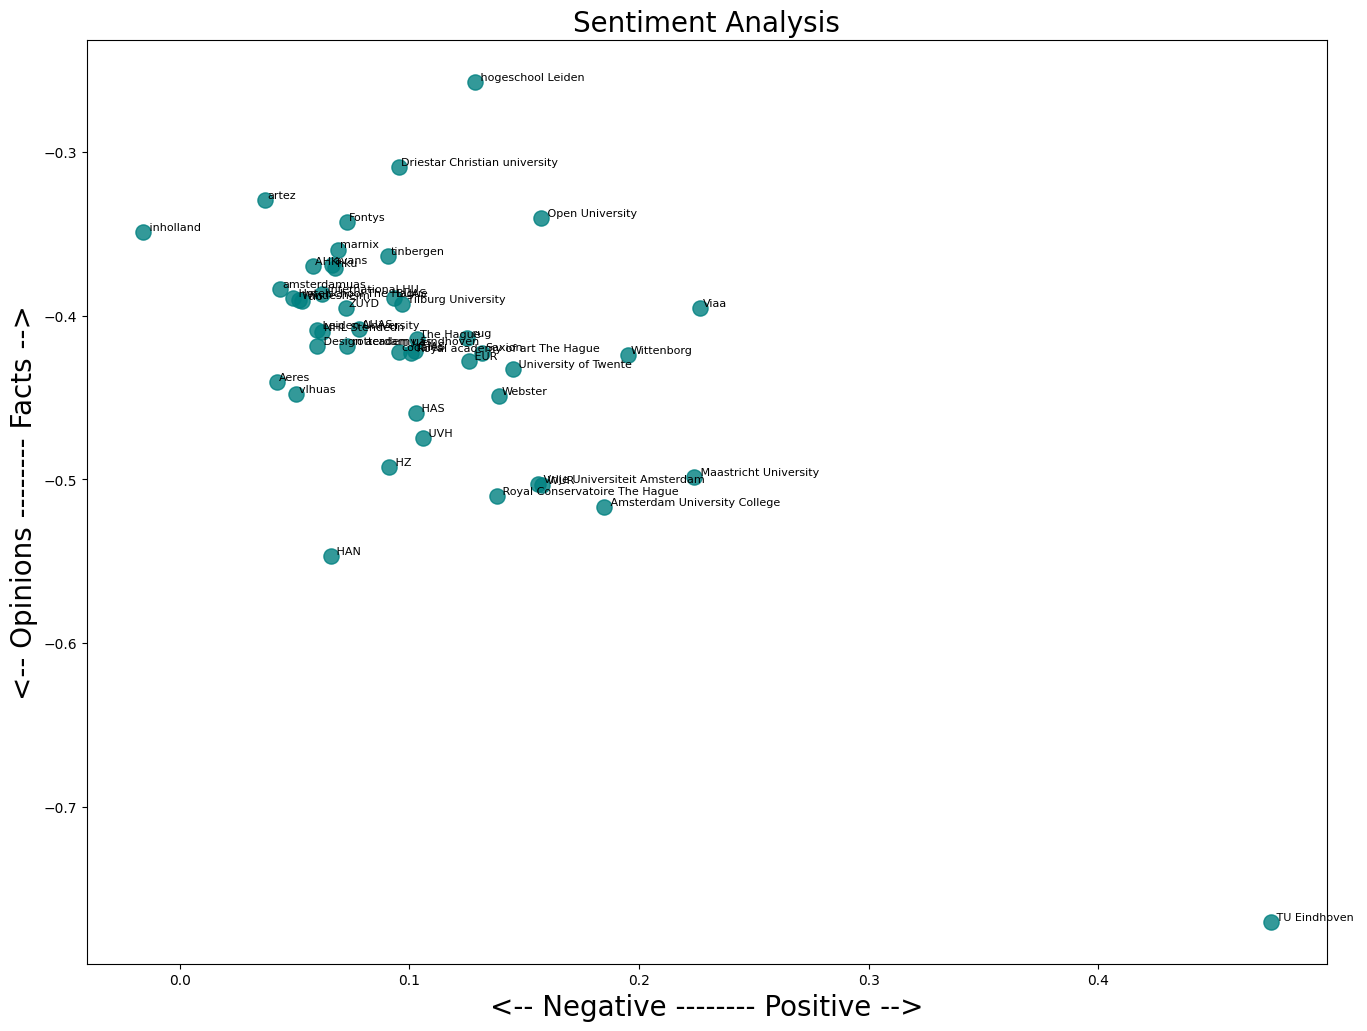

In [74]:
# Let's plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 12]

for index, uni in enumerate(data.index):
    x = data.polarity.loc[uni]
    y = - data.subjectivity.loc[uni]
    plt.scatter(x, y, color='#008080', s=120, alpha=.8)
    plt.text(x+.001, y+.001, data.index[index], fontsize=8)
    #plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)
plt.ylabel('<-- Opinions -------- Facts -->', fontsize=20)

plt.show()

---
### Sentiment through the corpus
<a id="3.1.2">

In [75]:
# Split each documents into 20 parts
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [76]:
data = data.head(18)

In [77]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.policy:
    split = split_text(t)
    list_pieces.append(split)   

In [78]:
# The list has 10 elements, one for each text
len(list_pieces)

18

In [79]:
# Calculate the Subjectivity for each piece of text
subjectivity_transcript = []
for sb in list_pieces:
    subjectivity_piece = []
    for s in sb:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)   

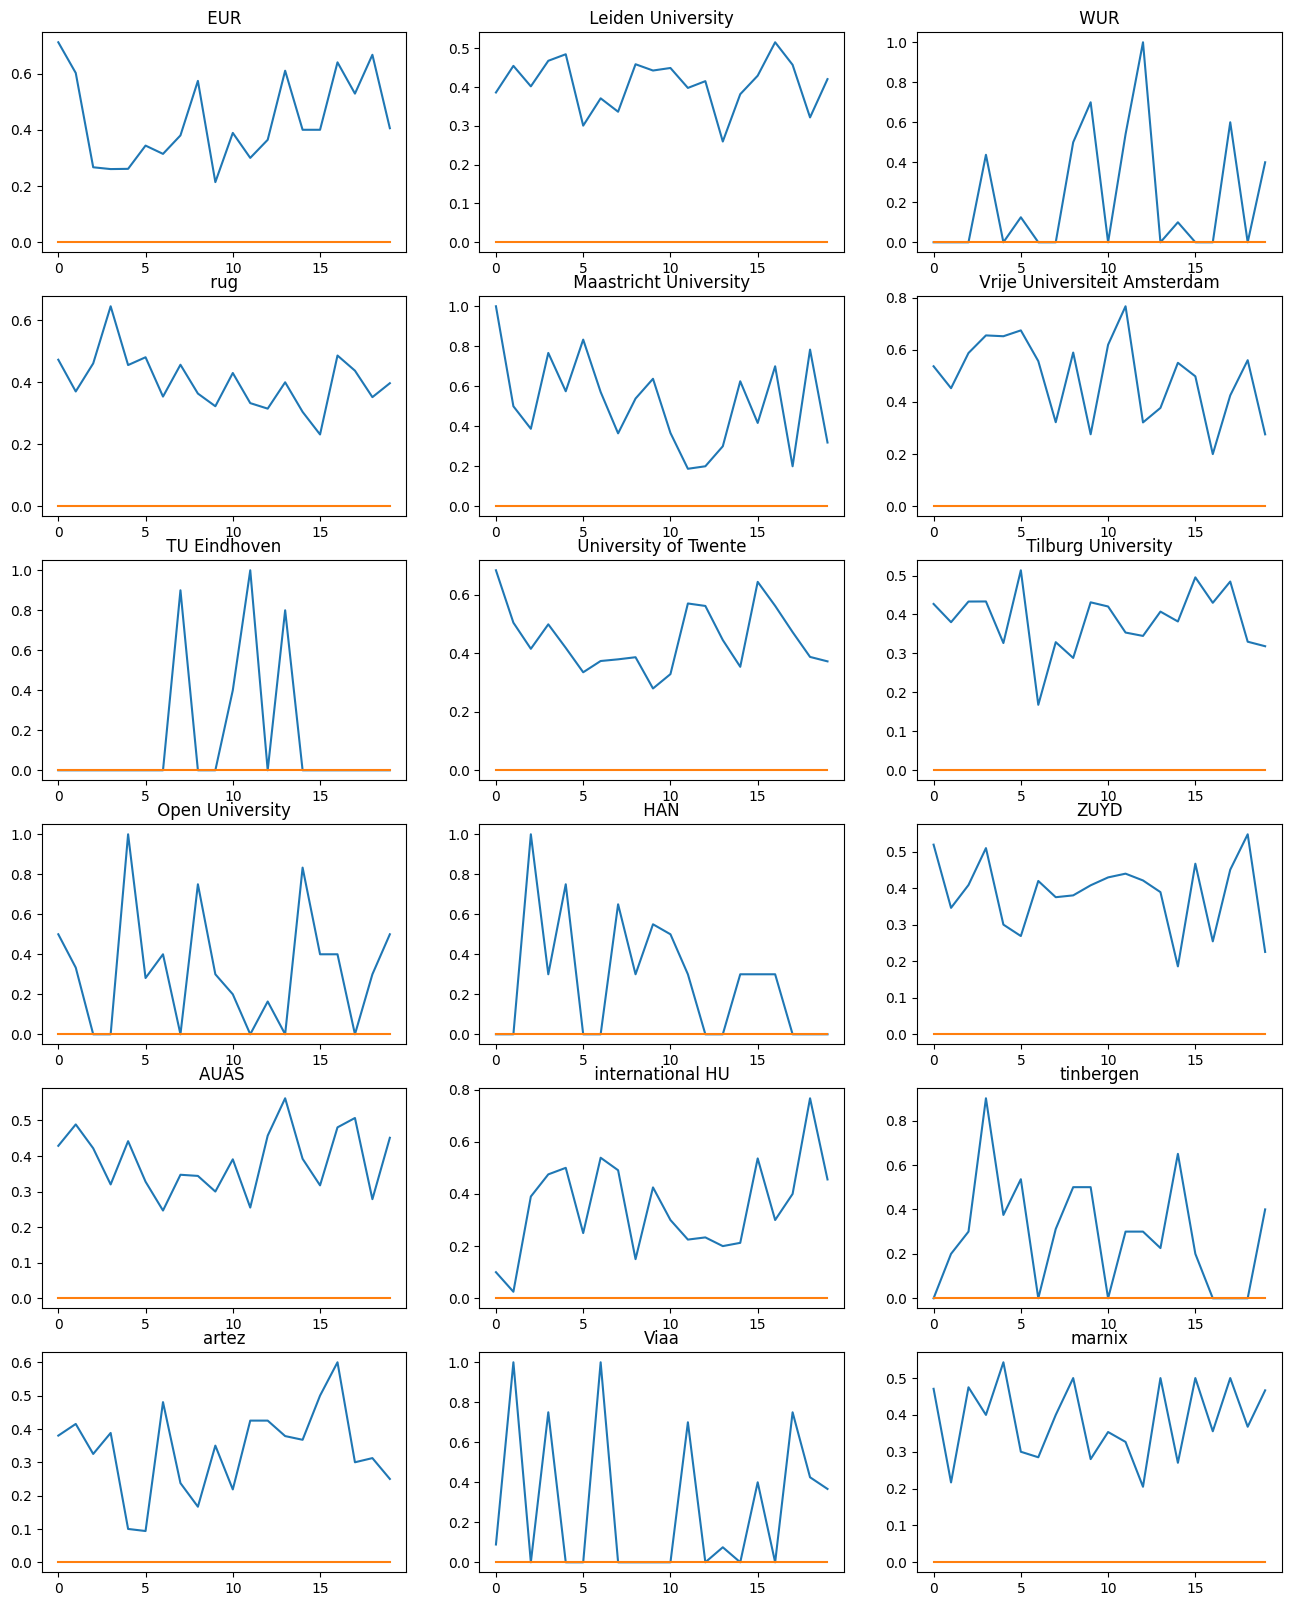

In [80]:
# Show the plot for all universities
plt.rcParams['figure.figsize'] = [16, 20]

for index, uni in enumerate(data.index):    
    plt.subplot(6, 3, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data.index[index])
    
plt.show()

# Text Similarity
Measuring how ‘close’ two pieces of text are both in surface closeness [lexical similarity] and meaning [semantic similarity].  

For instance, how similar are the phrases “the cat ate the mouse” with “the mouse ate the cat food” by just looking at the words?
On the surface, if you consider only word level similarity, these two phrases appear very similar as 3 of the 4 unique words are an exact overlap. It typically does not take into account the actual meaning behind words or the entire phrase in context.
- [UM Repo distance of cases](https://github.com/MaastrichtU-IDS/cjeu-court-decision-similarity) and [this](https://github.com/TarunSunkaraneni/Document-Similarity)
- [textdistance library](https://github.com/life4/textdistance) and a [blog](https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227)
- [Tokenizers library](https://github.com/huggingface/tokenizers)
### Text distance algorithms

In [81]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


In [82]:
data = pd.read_pickle('pickle/policy_matrix.pkl')
data.head(10)

,aa,aaanet,aan,ab,abbreviation,abbreviations,abdo,abide,abides,abjz,...,zaaizaad,zation,zelf,zero,zet,zip,zuyd,zuydnet,zwolle,zwollephone
EUR,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leiden University,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WUR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rug,0,0,0,0,1,0,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0
Maastricht University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vrije Universiteit Amsterdam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TU Eindhoven,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
University of Twente,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tilburg University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Open University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
uni1 = 'EUR'
all_tokens1 = data.iloc[0]
tokens1 = [i for i, j in zip(all_tokens1.index, all_tokens1) if j > 0]

In [84]:
uni2 = 'Leiden University'
all_tokens2 = data.iloc[1]
tokens2 = [i for i, j in zip(all_tokens2.index, all_tokens2) if j > 0]

In [85]:
import textdistance
print('Distances'
,textdistance.jaccard(tokens1 , tokens2)
,textdistance.hamming.distance(tokens1 , tokens2)
,textdistance.hamming.similarity(tokens1 , tokens2) #same
,textdistance.hamming.normalized_distance(tokens1 , tokens2)
     )

Distances 0.14506172839506173 1341 0 1.0


In [86]:
print('Distances',
textdistance.cosine.distance(tokens1 , tokens2),
textdistance.cosine.normalized_distance(tokens1 , tokens2),
     )

Distances 0.7169442941426932 0.7169442941426932


### comparing with Maastricht University

In [87]:
maas = 'Maastricht University'
bag_ow = data.iloc[4]
maas_tokens = [i for i, j in zip(bag_ow.index, bag_ow) if j > 0]

In [88]:
cosine_distance = []
for i in range(len(data.index)):
    bag = data.iloc[i]
    tokens = [i for i, j in zip(bag.index, bag) if j > 0]
    cosine_distance.append(textdistance.jaccard.distance(maas_tokens , tokens))

In [89]:
uni_names = list(data.index)
uni_names = uni_names*len(uni_names)

In [90]:
compared_unis = []
for uni in list(data.index):
    compared_unis.extend([uni]*len(list(data.index)))

In [91]:
cosine_distance =[]
for u in range(len(list(data.index))):
    bag_ow = data.iloc[u]
    uni_tokens = [i for i, j in zip(bag_ow.index, bag_ow) if j > 0]
    for u2 in range(len(list(data.index))):
        bag = data.iloc[u2]
        tokens = [i for i, j in zip(bag.index, bag) if j > 0]
        cosine_distance.append(textdistance.cosine.distance(uni_tokens , tokens)) 

In [92]:
jaccard_distance =[]
for u in range(len(list(data.index))):
    bag_ow = data.iloc[u]
    uni_tokens = [i for i, j in zip(bag_ow.index, bag_ow) if j > 0]
    for u2 in range(len(list(data.index))):
        bag = data.iloc[u2]
        tokens = [i for i, j in zip(bag.index, bag) if j > 0]
        jaccard_distance.append(textdistance.jaccard.distance(uni_tokens , tokens)) 

In [93]:
distances = pd.DataFrame({"university 1":uni_names,
                         "university 2":compared_unis,
                         "cosine distance": cosine_distance,
                         "jaccard distance":jaccard_distance})
distances.to_csv("policy distances.csv")
distances

,university 1,university 2,cosine distance,jaccard distance
0,EUR,EUR,0.000000,0.000000
1,Leiden University,EUR,0.716944,0.854938
2,WUR,EUR,0.845622,0.949091
3,rug,EUR,0.738846,0.865557
4,Maastricht University,EUR,0.787224,0.891045
...,...,...,...,...
2204,Wittenborg,amsterdamuas,0.783254,0.897084
2205,Royal Conservatoire The Hague,amsterdamuas,0.861508,0.960630
2206,codarts,amsterdamuas,0.850326,0.935540
2207,Webster,amsterdamuas,0.832813,0.927817


In [94]:
dist = distances.sort_values(['cosine distance'], ascending=[True])
dist[dist["cosine distance"]>0]

,university 1,university 2,cosine distance,jaccard distance
971,rotterdam uas,avans,0.551942,0.716628
1477,avans,rotterdam uas,0.551942,0.716628
2186,AHK,amsterdamuas,0.582543,0.736220
1174,amsterdamuas,AHK,0.582543,0.736220
1246,AHK,BUAS,0.596236,0.748563
...,...,...,...,...
325,Royal Conservatoire The Hague,TU Eindhoven,0.972610,0.986301
782,hogeschool Leiden,Viaa,0.982097,0.992481
1426,Viaa,hogeschool Leiden,0.982097,0.992481
304,vlhuas,TU Eindhoven,0.985666,0.994652


In [95]:
dist_j = distances.sort_values(['jaccard distance'], ascending=[True])
dist_j[dist_j["jaccard distance"]>0]

,university 1,university 2,cosine distance,jaccard distance
1477,avans,rotterdam uas,0.551942,0.716628
971,rotterdam uas,avans,0.551942,0.716628
2186,AHK,amsterdamuas,0.582543,0.736220
1174,amsterdamuas,AHK,0.582543,0.736220
1246,AHK,BUAS,0.596236,0.748563
...,...,...,...,...
322,Design academy Eindhoven,TU Eindhoven,0.962600,0.989899
782,hogeschool Leiden,Viaa,0.982097,0.992481
1426,Viaa,hogeschool Leiden,0.982097,0.992481
304,vlhuas,TU Eindhoven,0.985666,0.994652


In [96]:
dist2 = distances.sort_values(['cosine distance'], ascending=[False])
dist2

,university 1,university 2,cosine distance,jaccard distance
304,vlhuas,TU Eindhoven,0.985666,0.994652
1040,TU Eindhoven,vlhuas,0.985666,0.994652
782,hogeschool Leiden,Viaa,0.982097,0.992481
1426,Viaa,hogeschool Leiden,0.982097,0.992481
2027,TU Eindhoven,Royal Conservatoire The Hague,0.972610,0.986301
...,...,...,...,...
1344,HZ,HZ,0.000000,0.000000
1296,Driestar Christian university,Driestar Christian university,0.000000,0.000000
1248,BUAS,BUAS,0.000000,0.000000
1200,TIAS,TIAS,0.000000,0.000000


In [97]:
dist2_j = distances.sort_values(['jaccard distance'], ascending=[False])
dist2_j

,university 1,university 2,cosine distance,jaccard distance
304,vlhuas,TU Eindhoven,0.985666,0.994652
1040,TU Eindhoven,vlhuas,0.985666,0.994652
1426,Viaa,hogeschool Leiden,0.982097,0.992481
782,hogeschool Leiden,Viaa,0.982097,0.992481
1886,TU Eindhoven,Design academy Eindhoven,0.962600,0.989899
...,...,...,...,...
1344,HZ,HZ,0.000000,0.000000
1296,Driestar Christian university,Driestar Christian university,0.000000,0.000000
1248,BUAS,BUAS,0.000000,0.000000
1200,TIAS,TIAS,0.000000,0.000000


### Analysis
In text analysis, the most interesting numbers would be the most similar and the most apart. The four tables above clarifies that the differences aren't major between the two similarity algorithms. We can see that the most similar policies are rotterdam uas's policy and avans's policy. Then comes the policies of AHK and amsterdamuas which might be due to both universities being in Amsterdam which might conclude both universities use similar policies. On the other hand, TU Eindhoven and vlhuas have the most different policies. We can see that TU Eindhoven's policy is mentioned in all the most apart comparsions which sugests the policy is different than what other universities follows.